<a href="https://colab.research.google.com/drive/1n4a3Za-rdiMOwALTHMrhG08LxdI5ACkO" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analysing a time-dependent audio signal


<img src="RecordingExperiment.png" width="1000" height="1000" align="center"/>

In [80]:
### Import Necessary Libraries

In [219]:
#import necessary libraries
import numpy as np
#import the visulaisation library
import matplotlib.pyplot as plt 
#import the pandas library to deal with datasets
import pandas as pd
#import the wavelet library
import pywt 


### Import the Recored Audio Data

In [221]:
#import the datasets
Data = pd.read_excel('Audio.xlsx')

#check the size of the captured signal
Data.shape

(480, 2)

### Extract the Time and the Audio Data from the Imported Dataset

In [223]:
#extratc the time data
Time = Data.iloc[:,0]

#extract the audio signal data
St = Data.iloc[:,1]

### Visualise the Audio Signal in the Time Domain

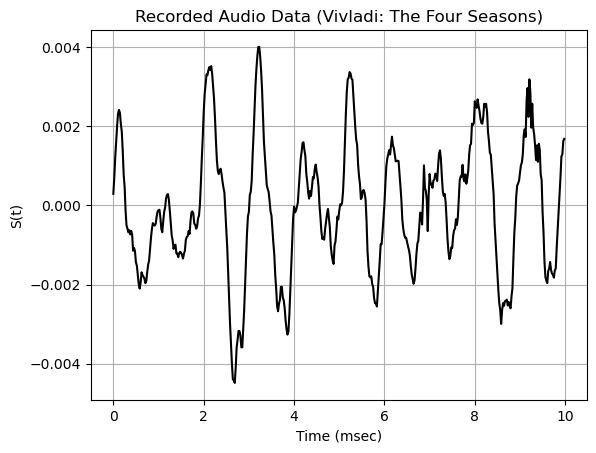

In [233]:
#visuliase the time data
plt.figure()
plt.plot(Time,St,'k')
plt.xlabel('Time (msec)')
plt.ylabel('S(t)')
plt.title('Recorded Audio Data (Vivladi: The Four Seasons)')
plt.grid()
plt.show()

### Take the Fast Fourier Transform of the Audio Data and Visuliase it in the Frequency Domain

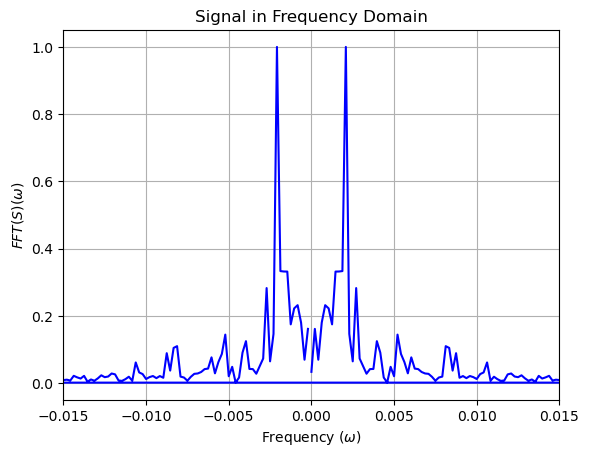

In [227]:
#Compute the Fourier Series of the collected audio recording
#define the range of the time domain
L  = 10 #msec

#Define the number of points in the time domain
#This should be equal to the number of the readings captured.
n  = Data.shape[0]

#Apply Fast Fourier Transform on the signal S(t)
Sf = np.fft.fft(St)

#Define wave number
k  = np.fft.fftfreq(n,L)

#visudlise
plt.plot(k, np.abs(Sf)/np.max(np.abs(Sf)),color='b')
plt.xlabel('Frequency $(\omega)$')
plt.ylabel('$FFT(S)(\omega)$')
plt.xlim([-0.015 , 0.015]) 
plt.title('Signal in Frequency Domain')
plt.grid() 
plt.show()

### Filter the audio sinal using Fast Fourier Tranfrom

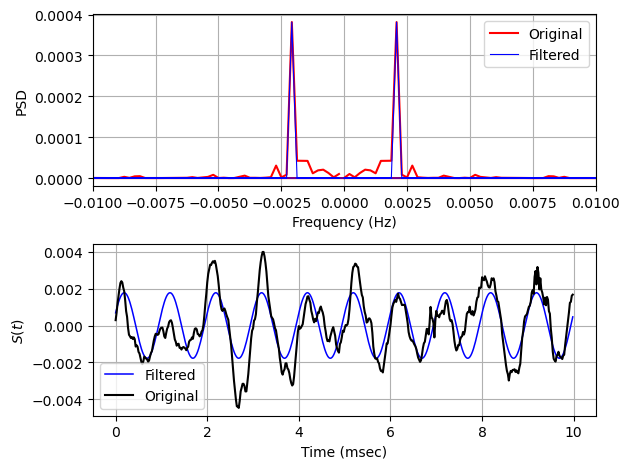

In [261]:
#compute the power spectrum density PSD
PSD = (Sf*np.conjugate(Sf))/n

#Use the PSD to filter out the noise
#find all frequencies with large power
indices = PSD > 0.00035
#zero out all others
PSDFiltered= PSD * indices

#zero out all small Fourier doeffs
Sf_filtered = Sf * indices 
#go back to the orginal singla after filtering its noise
f_filtered = np.fft.ifft(Sf_filtered)

#plot the PSD of the noisy and filtered signals
plt.subplot(2, 1, 1)
plt.plot(k, PSD.real,color='r')
plt.plot(k, PSDFiltered.real,color='b',linewidth=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.xlim([-0.01 , 0.01])
plt.legend(['Original','Filtered'],loc='upper right')
plt.grid() 
#plot the original and the filtered signal
plt.subplot(2, 1, 2)
plt.plot(Time, f_filtered.real,color='b',linewidth=1.1)
plt.plot(Time,St,color='k')
plt.xlabel('Time (msec)')
plt.ylabel('$S(t)$')
plt.legend(['Filtered','Original'],loc='lower left')
plt.grid() 
plt.tight_layout()
plt.show()

### Spectrogram 

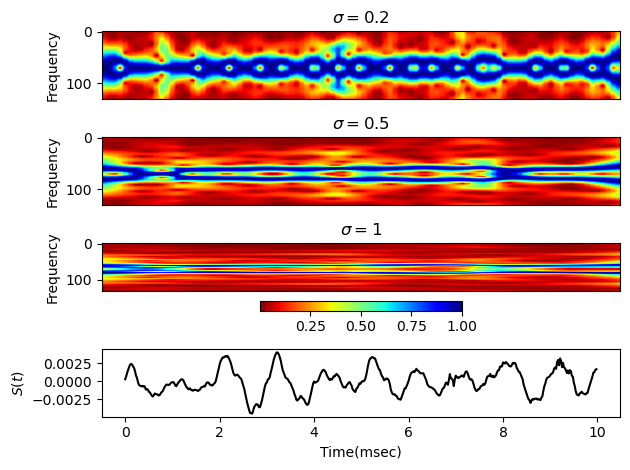

In [267]:
#Time-Frequency Analsyis: Applying Gabor Transform & Spectrogram
#---------------------------------------------------------------
#Define the time variable for iteration
m = 100
tau = np.linspace(0,L,num=m)

#go through the iterations and calculate the Gabor function in each
#width 1 = 0.2
spec1 = [] #initilaise the spectrogram matrix
for i in range(len(tau)): 
    #define the width of the Gaussian window
    width1 = 0.2
    #Define Gabor window/Gaussian 
    tslide = Time-tau[i]
    g1 = np.exp(-(tslide/width1)**2)    
    #Gabor signal
    Sg1 = g1*St    
    #Taking the Fourier transform of the resulting signal
    Sgf1 = np.fft.fft(Sg1)  
    #store the spectrogram data at each iteration
    spec1.append(abs(np.fft.fftshift(Sgf1))/np.max(abs(np.fft.fftshift(Sgf1))))
#slice/extract the spectrogram matrix
spec1 = np.array(spec1) #convert it to nd array
spec1 = spec1[:,170:300] #slice it: choose the frequencies that matter 
#-------------------------
#width 2 = 0.5
spec2 = [] #initilaise the spectrogram matrix
for i in range(len(tau)): 
    #define the width of the Gaussian window
    width2 = 0.5
    #Define Gabor window/Gaussian 
    tslide = Time-tau[i]
    g2 = np.exp(-(tslide/width2)**2)    
    #Gabor signal
    Sg2 = g2*St    
    #Taking the Fourier transform of the resulting signal
    Sgf2 = np.fft.fft(Sg2)  
    #store the spectrogram data at each iteration
    spec2.append(abs(np.fft.fftshift(Sgf2))/np.max(abs(np.fft.fftshift(Sgf2))))
#slice/extract the spectrogram matrix
spec2 = np.array(spec2) #convert it to nd array
spec2 = spec2[:,170:300] #slice it: choose the frequencies that matter 
#-------------------------
#width 3 = 1
spec3 = [] #initilaise the spectrogram matrix
for i in range(len(tau)): 
    #define the width of the Gaussian window
    width3 = 1
    #Define Gabor window/Gaussian 
    tslide = Time-tau[i]
    g3 = np.exp(-(tslide/width3)**2)    
    #Gabor signal
    Sg3 = g3*St    
    #Taking the Fourier transform of the resulting signal
    Sgf3 = np.fft.fft(Sg3)  
    #store the spectrogram data at each iteration
    spec3.append(abs(np.fft.fftshift(Sgf3))/np.max(abs(np.fft.fftshift(Sgf3))))
#slice/extract the spectrogram matrix
spec3 = np.array(spec3) #convert it to nd array
spec3 = spec3[:,170:300] #slice it: choose the frequencies that matter 
#-------------------------

#plotting 
plt.figure()
#plot the spectrogram
#width 1
plt.subplot(4,1,1)
plt.imshow(np.transpose(spec1),cmap = "jet_r")
plt.tick_params(left = True, right = False , labelleft = True , 
                labelbottom = False, bottom = False) 
plt.axis("tight")
plt.ylabel("Frequency")
plt.title('$\sigma = 0.2$')
#-------
#width 2
plt.subplot(4,1,2)
plt.imshow(np.transpose(spec2),cmap = "jet_r")
plt.tick_params(left = True, right = False , labelleft = True , 
                labelbottom = False, bottom = False) 
plt.axis("tight")
plt.ylabel("Frequency")
plt.title('$\sigma = 0.5$')
#-------
#width 3
plt.subplot(4,1,3)
plt.imshow(np.transpose(spec3),cmap = "jet_r")
plt.tick_params(left = True, right = False , labelleft = True , 
                labelbottom = False, bottom = False) 
plt.axis("tight")
plt.ylabel("Frequency")
plt.title('$\sigma = 1$')
plt.colorbar(location='bottom')
#-------
#plot the time-varying signal
plt.subplot(4,1,4)
plt.plot(Time,St,"k")
plt.xlabel('Time(msec)')
plt.ylabel("$S(t)$")
plt.axis("tight")
plt.tight_layout()
plt.show()

### Scaelogram

In [245]:
# Apply CWT
coefficients1c, frequencies1c = pywt.cwt(St, scales=np.arange(1, 128), wavelet='mexh') #mexican

#apply the DWT
coefficients1d                = pywt.dwt(St, wavelet='haar') #haar

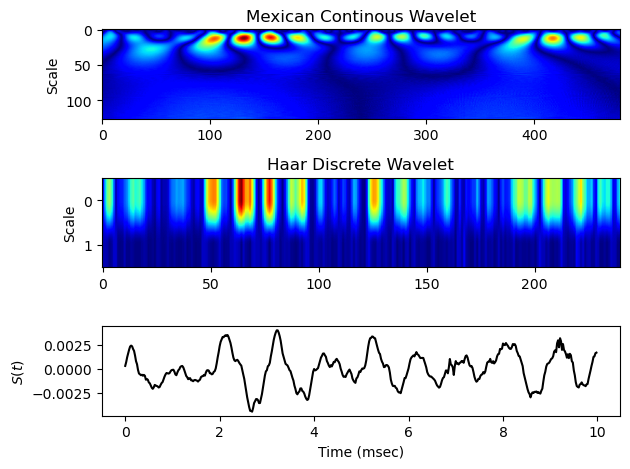

In [247]:
# Plotting
plt.figure()
#plot mexican wavelet
plt.subplot(3,1,1)
plt.imshow(np.abs(coefficients1c)/np.max(np.abs(coefficients1c)), aspect='auto', cmap='jet')
plt.ylabel("Scale")
plt.title('Mexican Continous Wavelet')
#plot the haar
plt.subplot(3,1,2)
plt.imshow(np.abs(coefficients1d)/np.max(np.abs(coefficients1d)), aspect='auto',cmap='jet')
plt.ylabel("Scale")
plt.title('Haar Discrete Wavelet')
#plot the signal
plt.subplot(3,1,3)
plt.plot(Time,Recording,'k')
plt.xlabel("Time (msec)")
plt.ylabel("$S(t)$")
plt.tight_layout()
plt.show()